# Bank marketing campaign EDA

## Importing the necessary libriaries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## Reading the dataset

In [17]:
df=pd.read_csv(r"C:\Users\HARIHARAN\Downloads\bank-direct-marketing-campaigns.csv\bank-direct-marketing-campaigns.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [18]:
df.shape


(41188, 20)

In [6]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [9]:
df.marital.value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [10]:
df.job.value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [11]:
df.education.value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [12]:
df['cons.price.idx'].value_counts()

cons.price.idx
93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: count, dtype: int64

## Visualizations

__Distribution of different age groups where the campaign is performed__

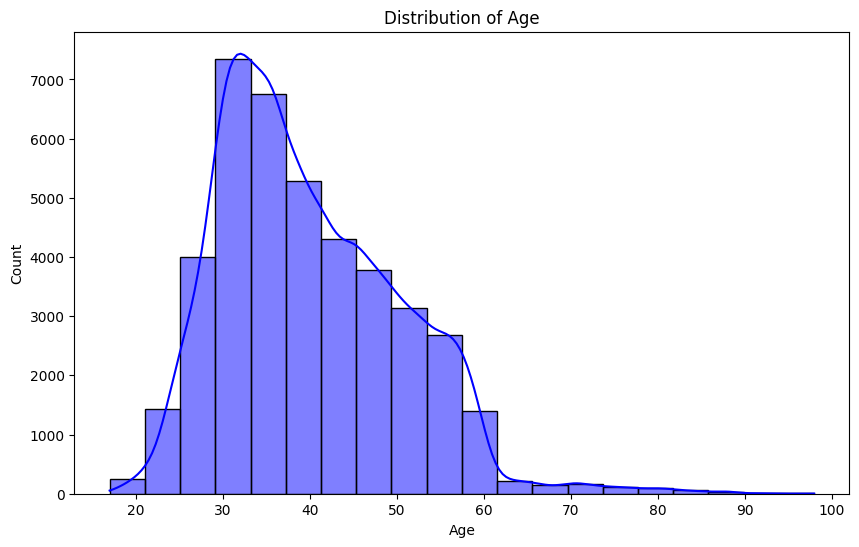

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

__Result of the campaign__

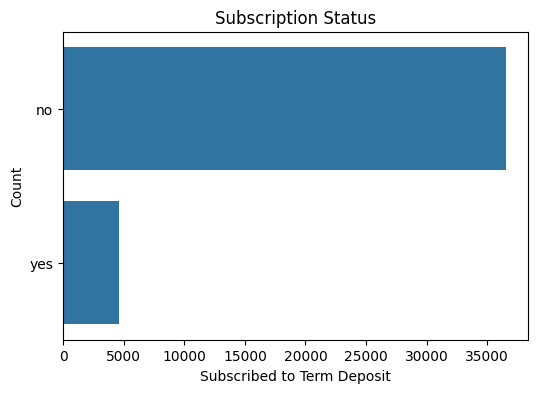

In [44]:
plt.figure(figsize=(6, 4))
sns.countplot(df['y'])
plt.title('Subscription Status')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Count')
plt.show()


## Finding and removing outliers using IQR method

<Axes: ylabel='age'>

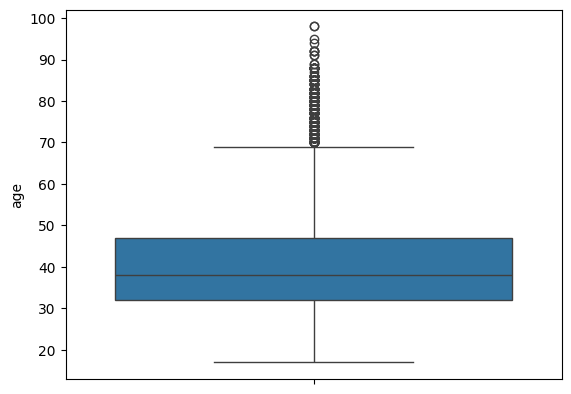

In [10]:
sns.boxplot(df.age)

In [46]:
df.campaign.value_counts()

campaign
1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: count, dtype: int64

In [12]:
df.age.value_counts()

age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64

In [19]:
q1=df.age.quantile(0.25)
q1

32.0

In [20]:
q3=df.age.quantile(0.75)
q3

47.0

In [21]:
IQR=q3-q1
IQR

15.0

In [22]:
upper=q3+1.5*IQR
lower=q1-1.5*IQR
upper,lower

(69.5, 9.5)

In [23]:
df1=df[(df["age"]>=lower) & (df["age"]<=upper)]
df1.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,40719.000000,40719.000000,40719.000000,40719.000000,40719.000000,40719.000000,40719.000000,40719.000000,40719.000000
mean,39.599008,2.574818,964.446033,0.167096,0.110067,93.580967,-40.549267,3.652601,5168.608770
std,9.674971,2.779474,181.982267,0.483559,1.555365,0.574207,4.568686,1.719296,71.008345
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.354000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.798000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,69.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [24]:
df1.shape

(40719, 20)

C:\Users\HARIHARAN\AppData\Local\Temp\ipykernel_22828\3787714650.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.age)


<Axes: xlabel='age', ylabel='Density'>

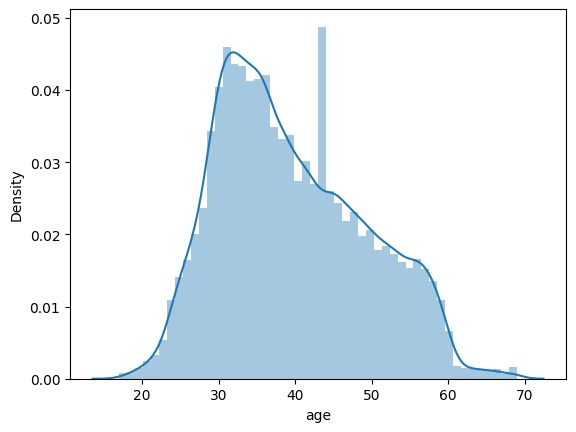

In [54]:
sns.distplot(df1.age)

<Axes: ylabel='campaign'>

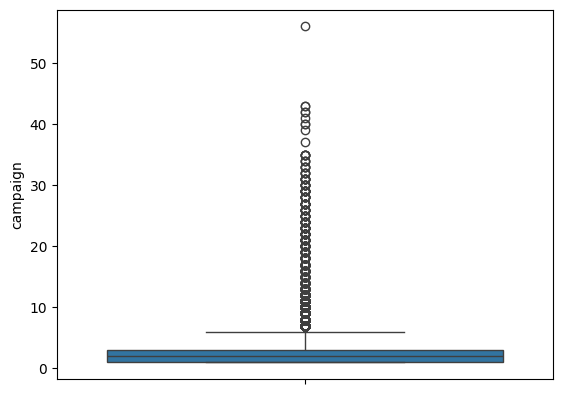

In [22]:
sns.boxplot(df.campaign)


C:\Users\HARIHARAN\AppData\Local\Temp\ipykernel_56864\1652604569.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.campaign)


<Axes: xlabel='campaign', ylabel='Density'>

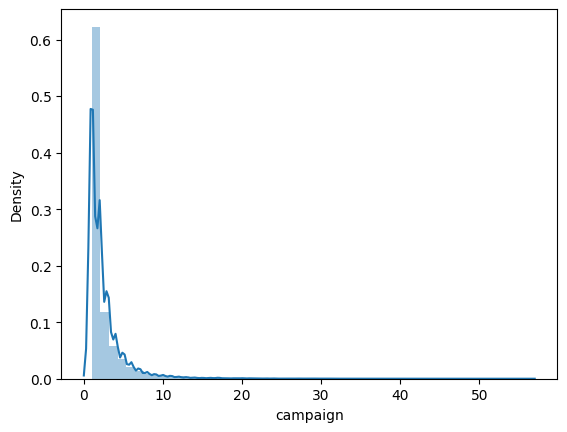

In [23]:
sns.distplot(df.campaign)

In [24]:
df.campaign.agg(["skew"])

skew    4.762507
Name: campaign, dtype: float64

In [25]:
q11=df.campaign.quantile(0.25)
q11


1.0

In [26]:
q33=df.campaign.quantile(0.75)
q33

3.0

In [27]:
IQR1=q33-q11
IQR1

2.0

In [28]:
lower1=q11-1.5*IQR1
upper1=q33+1.5*IQR1
upper1,lower1

(6.0, -2.0)

In [45]:
df2=df1[(df1["campaign"]>=lower1) & (df1["campaign"]<=upper1)]

df2.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,38327.000000,38327.000000,38327.000000,38327.000000,38327.000000,38327.000000,38327.000000,38327.000000,38327.000000
mean,39.577922,2.047904,962.677877,0.174551,0.064800,93.567786,-40.547645,3.607315,5166.591852
std,9.679502,1.282004,186.408865,0.493401,1.566085,0.576152,4.619697,1.732225,71.660963
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,69.000000,6.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [46]:
df2.shape

(38327, 20)

C:\Users\HARIHARAN\AppData\Local\Temp\ipykernel_56864\2342760484.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.campaign)


<Axes: xlabel='campaign', ylabel='Density'>

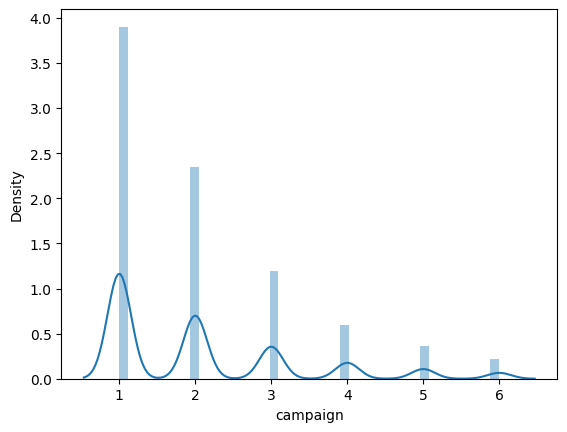

In [31]:
sns.distplot(df2.campaign)

<Axes: ylabel='campaign'>

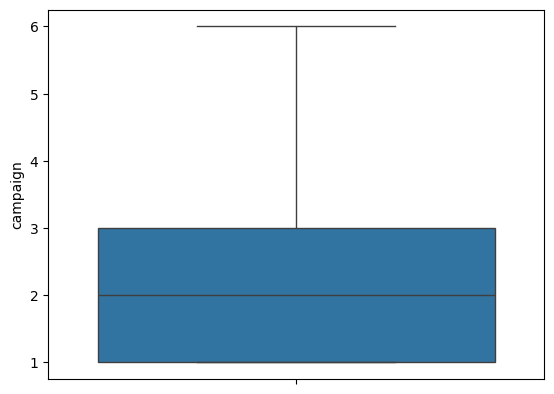

In [32]:
sns.boxplot(df2.campaign)

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38327 entries, 0 to 41186
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38327 non-null  int64  
 1   job             38327 non-null  object 
 2   marital         38327 non-null  object 
 3   education       38327 non-null  object 
 4   default         38327 non-null  object 
 5   housing         38327 non-null  object 
 6   loan            38327 non-null  object 
 7   contact         38327 non-null  object 
 8   month           38327 non-null  object 
 9   day_of_week     38327 non-null  object 
 10  campaign        38327 non-null  int64  
 11  pdays           38327 non-null  int64  
 12  previous        38327 non-null  int64  
 13  poutcome        38327 non-null  object 
 14  emp.var.rate    38327 non-null  float64
 15  cons.price.idx  38327 non-null  float64
 16  cons.conf.idx   38327 non-null  float64
 17  euribor3m       38327 non-null  floa

In [61]:
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Creating dummy variables inplace of the catagorical variables

In [31]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [32]:
dummy=pd.get_dummies(df2[categorical_columns],drop_first=True,prefix=categorical_columns,dtype=float)

In [47]:
df3=pd.concat([df2,dummy],axis=1)

In [48]:
df3.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [35]:
df3.shape

(38327, 63)

In [49]:
df3.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'],inplace=True)

In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38327 entries, 0 to 41186
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            38327 non-null  int64  
 1   campaign                       38327 non-null  int64  
 2   pdays                          38327 non-null  int64  
 3   previous                       38327 non-null  int64  
 4   emp.var.rate                   38327 non-null  float64
 5   cons.price.idx                 38327 non-null  float64
 6   cons.conf.idx                  38327 non-null  float64
 7   euribor3m                      38327 non-null  float64
 8   nr.employed                    38327 non-null  float64
 9   y                              38327 non-null  object 
 10  job_blue-collar                38327 non-null  float64
 11  job_entrepreneur               38327 non-null  float64
 12  job_housemaid                  38327 non-null  floa

## Scaling the variables other than that of the target variable

In [38]:

numeric_columns = df3.select_dtypes(include=['int', 'float']).columns


scaler = StandardScaler()


scaler.fit(df3[numeric_columns])


df_scaled = df3.copy()
df_scaled[numeric_columns] = scaler.transform(df3[numeric_columns])
df_scaled

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1.696605,-0.817406,0.194854,-0.353775,0.661020,0.739769,0.897829,0.721443,0.340610,no,...,1.389477,-0.341026,-0.131038,-0.115783,1.949173,-0.512186,-0.496271,-0.497251,0.401689,-0.185126
1,1.799917,-0.817406,0.194854,-0.353775,0.661020,0.739769,0.897829,0.721443,0.340610,no,...,1.389477,-0.341026,-0.131038,-0.115783,1.949173,-0.512186,-0.496271,-0.497251,0.401689,-0.185126
2,-0.266331,-0.817406,0.194854,-0.353775,0.661020,0.739769,0.897829,0.721443,0.340610,no,...,1.389477,-0.341026,-0.131038,-0.115783,1.949173,-0.512186,-0.496271,-0.497251,0.401689,-0.185126
3,0.043606,-0.817406,0.194854,-0.353775,0.661020,0.739769,0.897829,0.721443,0.340610,no,...,1.389477,-0.341026,-0.131038,-0.115783,1.949173,-0.512186,-0.496271,-0.497251,0.401689,-0.185126
4,1.696605,-0.817406,0.194854,-0.353775,0.661020,0.739769,0.897829,0.721443,0.340610,no,...,1.389477,-0.341026,-0.131038,-0.115783,1.949173,-0.512186,-0.496271,-0.497251,0.401689,-0.185126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,-0.266331,-0.817406,0.194854,-0.353775,-0.743776,2.081446,-2.219299,-1.489038,-2.832707,yes,...,-0.719695,2.932328,-0.131038,-0.115783,-0.513038,-0.512186,-0.496271,-0.497251,0.401689,-0.185126
41182,-1.092831,-0.817406,-5.116121,1.673001,-0.743776,2.081446,-2.219299,-1.489038,-2.832707,no,...,-0.719695,2.932328,-0.131038,-0.115783,-0.513038,-0.512186,-0.496271,-0.497251,-2.489490,5.401735
41184,0.663481,-0.817406,0.194854,-0.353775,-0.743776,2.081446,-2.219299,-1.489038,-2.832707,no,...,-0.719695,2.932328,-0.131038,-0.115783,-0.513038,-0.512186,-0.496271,-0.497251,0.401689,-0.185126
41185,1.696605,-0.037367,0.194854,-0.353775,-0.743776,2.081446,-2.219299,-1.489038,-2.832707,no,...,-0.719695,2.932328,-0.131038,-0.115783,-0.513038,-0.512186,-0.496271,-0.497251,0.401689,-0.185126


## Splitting the data into independent and target variables

In [50]:
df_scaled.y.unique()
df_scaled.y.value_counts()


y
no     34015
yes     4312
Name: count, dtype: int64

In [51]:
convert_to_numeric = lambda x: 1 if x == 'yes' else 0
df_scaled['y'] = df_scaled['y'].apply(convert_to_numeric)

In [52]:
df_scaled.y.unique()

array([0, 1], dtype=int64)

In [53]:
df_scaled.y.value_counts()

y
0    34015
1     4312
Name: count, dtype: int64

In [54]:
y=df_scaled["y"]
y

0        0
1        0
2        0
3        0
4        0
        ..
41181    1
41182    0
41184    0
41185    0
41186    1
Name: y, Length: 38327, dtype: int64

In [179]:
df_scaled

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1.696605,-0.817406,0.194854,-0.353775,0.661020,0.739769,0.897829,0.721443,0.340610,0,...,1.389477,-0.341026,-0.131038,-0.115783,1.949173,-0.512186,-0.496271,-0.497251,0.401689,-0.185126
1,1.799917,-0.817406,0.194854,-0.353775,0.661020,0.739769,0.897829,0.721443,0.340610,0,...,1.389477,-0.341026,-0.131038,-0.115783,1.949173,-0.512186,-0.496271,-0.497251,0.401689,-0.185126
2,-0.266331,-0.817406,0.194854,-0.353775,0.661020,0.739769,0.897829,0.721443,0.340610,0,...,1.389477,-0.341026,-0.131038,-0.115783,1.949173,-0.512186,-0.496271,-0.497251,0.401689,-0.185126
3,0.043606,-0.817406,0.194854,-0.353775,0.661020,0.739769,0.897829,0.721443,0.340610,0,...,1.389477,-0.341026,-0.131038,-0.115783,1.949173,-0.512186,-0.496271,-0.497251,0.401689,-0.185126
4,1.696605,-0.817406,0.194854,-0.353775,0.661020,0.739769,0.897829,0.721443,0.340610,0,...,1.389477,-0.341026,-0.131038,-0.115783,1.949173,-0.512186,-0.496271,-0.497251,0.401689,-0.185126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,-0.266331,-0.817406,0.194854,-0.353775,-0.743776,2.081446,-2.219299,-1.489038,-2.832707,1,...,-0.719695,2.932328,-0.131038,-0.115783,-0.513038,-0.512186,-0.496271,-0.497251,0.401689,-0.185126
41182,-1.092831,-0.817406,-5.116121,1.673001,-0.743776,2.081446,-2.219299,-1.489038,-2.832707,0,...,-0.719695,2.932328,-0.131038,-0.115783,-0.513038,-0.512186,-0.496271,-0.497251,-2.489490,5.401735
41184,0.663481,-0.817406,0.194854,-0.353775,-0.743776,2.081446,-2.219299,-1.489038,-2.832707,0,...,-0.719695,2.932328,-0.131038,-0.115783,-0.513038,-0.512186,-0.496271,-0.497251,0.401689,-0.185126
41185,1.696605,-0.037367,0.194854,-0.353775,-0.743776,2.081446,-2.219299,-1.489038,-2.832707,0,...,-0.719695,2.932328,-0.131038,-0.115783,-0.513038,-0.512186,-0.496271,-0.497251,0.401689,-0.185126


In [55]:
df_scaled.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'

In [56]:
x=df_scaled[['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success']]

In [57]:
x.shape

(38327, 52)

## Performing resampling 



In [58]:
smote=SMOTE(random_state=42)
X1,Y1=smote.fit_resample(x,y)
X1.shape,Y1.shape,Y1.value_counts()

((68030, 52),
 (68030,),
 y
 0    34015
 1    34015
 Name: count, dtype: int64)

## Splitting the data into training and testing data

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2)

In [60]:
X_train.shape

(54424, 52)

In [61]:
X_test.shape

(13606, 52)

## Implementing a Logistic Regression model and finding the accuracy score

In [62]:
LR=LogisticRegression()
model=LR.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred
score=accuracy_score(y_test,y_pred)
score


0.7410701161252389

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77      6895
           1       0.79      0.64      0.71      6711

    accuracy                           0.74     13606
   macro avg       0.75      0.74      0.74     13606
weighted avg       0.75      0.74      0.74     13606

